# KIVA

Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.


## Loading Libraries

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import folium
import plotly.express as px

## Importing Data

In [2]:
kiva_loans = pd.read_csv("kiva_loans.csv")
kiva_mpi_region_location = pd.read_csv("kiva_mpi_region_locations.csv")
loan_theme_ids = pd.read_csv("loan_theme_ids.csv")
loan_themes_by_region = pd.read_csv("loan_themes_by_region.csv")

In [3]:
kiva_loans["date"] = pd.to_datetime(kiva_loans["date"], format = "%Y-%m-%d")
kiva_loans["year"] = kiva_loans.date.dt.year
kiva_loans["month"] = kiva_loans.date.dt.month_name()
kiva_loans["day_week"] = kiva_loans.date.dt.day_name()
kiva_loans["number_month"]=kiva_loans.date.dt.month
kiva_loans

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,year,month,day_week,number_month
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,12.0,12,NaN,female,irregular,2014-01-01,2014,January,Wednesday,1
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,11.0,14,NaN,"female, female",irregular,2014-01-01,2014,January,Wednesday,1
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,2014,January,Wednesday,1
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,11.0,8,NaN,female,irregular,2014-01-01,2014,January,Wednesday,1
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,14.0,16,NaN,female,monthly,2014-01-01,2014,January,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,...,13.0,0,NaN,female,monthly,2017-07-25,2017,July,Tuesday,7
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,13.0,1,NaN,female,monthly,2017-07-25,2017,July,Tuesday,7
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,...,13.0,0,NaN,NaN,monthly,2017-07-26,2017,July,Wednesday,7
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,...,13.0,0,NaN,female,monthly,2017-07-26,2017,July,Wednesday,7


In [4]:
kiva_mpi_region_location

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
...,...,...,...,...,...,...,...,...,...
2767,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2768,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2769,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2770,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN


In [5]:
loan_theme_ids

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0
...,...,...,...,...
779087,1444237,a1050000000wf0h,General,136.0
779088,1444238,a1050000000wf0h,General,136.0
779089,1444240,a1050000000wf0h,General,136.0
779090,1444241,a1050000000wf22,General,245.0


In [6]:
loan_themes_by_region

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15731,539,"N/A, direct to Sevamob",DSE Direct,a10500000081IYl,Health,South Africa,No,Nkangala,NaN,ZAF,...,50000,"Nkangala, South Africa","[(-25.9459898, 29.6035495)]",Nkangala; Mpumalanga; South Africa,"(-25.9459898, 29.6035495)",-25.945990,29.603549,ZAF,NaN,NaN
15732,540,"N/A, direct to Sanergy",DSE Direct,a10500000081HIw,Water and Sanitation,Kenya,No,Nairobi,"(-1.2833333, 36.8166667)",KEN,...,50000,"Nairobi, Kenya","[(-1.2920659, 36.8219462)]",Nairobi; Nairobi County; Kenya,"(-1.2920659, 36.8219462)",-1.292066,36.821946,"Nairobi, Kenya","(-1.2920659, 36.8219462)",NaN
15733,542,N/A direct to BioLite Inc.,DSE Direct,a1050000008AQrj,Clean Cookstove,Uganda,No,Kampala,"(0.3155556, 32.5655556)",UGA,...,50000,"Kampala, Uganda","[(0.3475964, 32.5825197)]",Kampala; Kampala; Central Region; Uganda,"(0.3475964, 32.5825197)",0.347596,32.582520,"Kampala, Uganda","(0.3475964, 32.5825197)",NaN
15734,543,N/A direct to LegWorks Inc.,DSE Direct,a1050000008AQwt,Health,Canada,No,Toronto,NaN,CAN,...,50000,"Toronto, Canada","[(43.653226, -79.3831843)]",Toronto; Toronto Division; Ontario; Canada,"(43.653226, -79.3831843)",43.653226,-79.383184,CAN,NaN,NaN


## Check for missing data

In [7]:
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  671205 non-null  int64         
 1   funded_amount       671205 non-null  float64       
 2   loan_amount         671205 non-null  float64       
 3   activity            671205 non-null  object        
 4   sector              671205 non-null  object        
 5   use                 666973 non-null  object        
 6   country_code        671197 non-null  object        
 7   country             671205 non-null  object        
 8   region              614405 non-null  object        
 9   currency            671205 non-null  object        
 10  partner_id          657698 non-null  float64       
 11  posted_time         671205 non-null  object        
 12  disbursed_time      668809 non-null  object        
 13  funded_time         622874 no

In [8]:
kiva_mpi_region_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [9]:
loan_theme_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779092 entries, 0 to 779091
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               779092 non-null  int64  
 1   Loan Theme ID    764279 non-null  object 
 2   Loan Theme Type  764279 non-null  object 
 3   Partner ID       764279 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.8+ MB


In [10]:
loan_themes_by_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15736 entries, 0 to 15735
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Partner ID          15736 non-null  int64  
 1   Field Partner Name  15736 non-null  object 
 2   sector              15736 non-null  object 
 3   Loan Theme ID       15736 non-null  object 
 4   Loan Theme Type     15736 non-null  object 
 5   country             15736 non-null  object 
 6   forkiva             15736 non-null  object 
 7   region              15736 non-null  object 
 8   geocode_old         1200 non-null   object 
 9   ISO                 15722 non-null  object 
 10  number              15736 non-null  int64  
 11  amount              15736 non-null  int64  
 12  LocationName        15736 non-null  object 
 13  geocode             13662 non-null  object 
 14  names               13661 non-null  object 
 15  geo                 15736 non-null  object 
 16  lat 

## Data exploration

### Number of loans by currency

- PHP: Philippines
- USD: American Dollars
- KES: Kenia
- KHR: Cambodian riel


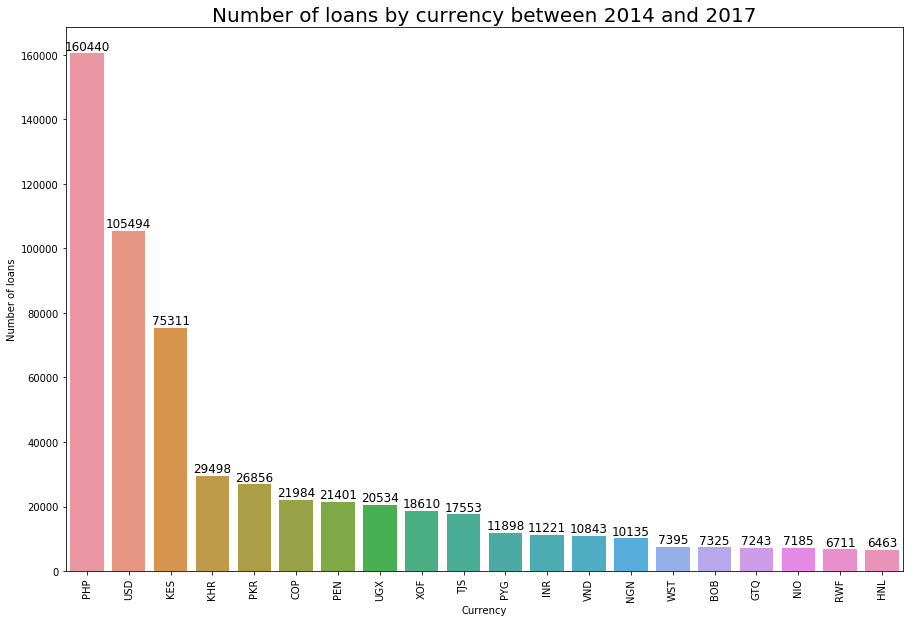

In [11]:
currency_loans = kiva_loans.groupby(["currency"]).id.count().reset_index().sort_values(by="id", ascending=False).iloc[:20]

plt.figure(figsize=(15,10))
chart =sns.barplot(data= currency_loans, x="currency", y="id")
plt.xticks(rotation=90)
for p in chart.patches:
    chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.title("Number of loans by currency between 2014 and 2017", fontsize=20)
plt.ylabel("Number of loans", fontsize=10)
plt.xlabel("Currency")
plt.show()


### Number of loans per year

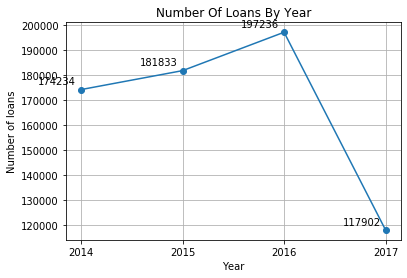

In [12]:
loans_years = kiva_loans.groupby("year").date.count().reset_index()

fig, ax = plt.subplots()
ax.plot(loans_years.year, loans_years.date, marker="o")
for X, Y in zip(loans_years.year,loans_years.date):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(Y), xy=(X,Y), xytext=(-5, 5), ha='right',
                textcoords='offset points')

plt.xticks(loans_years.year.tolist())
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Number of loans")
plt.title("Number of loans by Year".title())
plt.show()

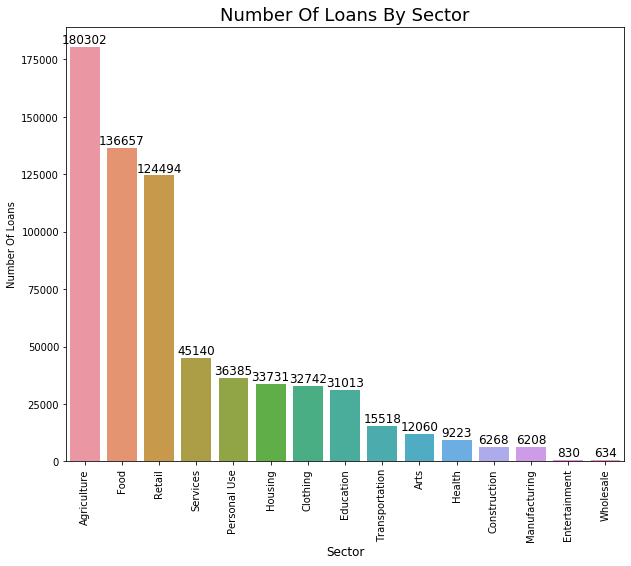

In [13]:
sector_pie = kiva_loans.groupby("sector").country.count().reset_index().sort_values(by="country", ascending=False)
plt.figure(figsize=(10,8))
chart=sns.barplot(data = sector_pie, x="sector", y ="country")
for p in chart.patches:
    chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.xticks(rotation=90)
plt.title("Number of loans by sector".title(), fontsize=18)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("number of loans".title())
plt.show()

### Number of loans in different years

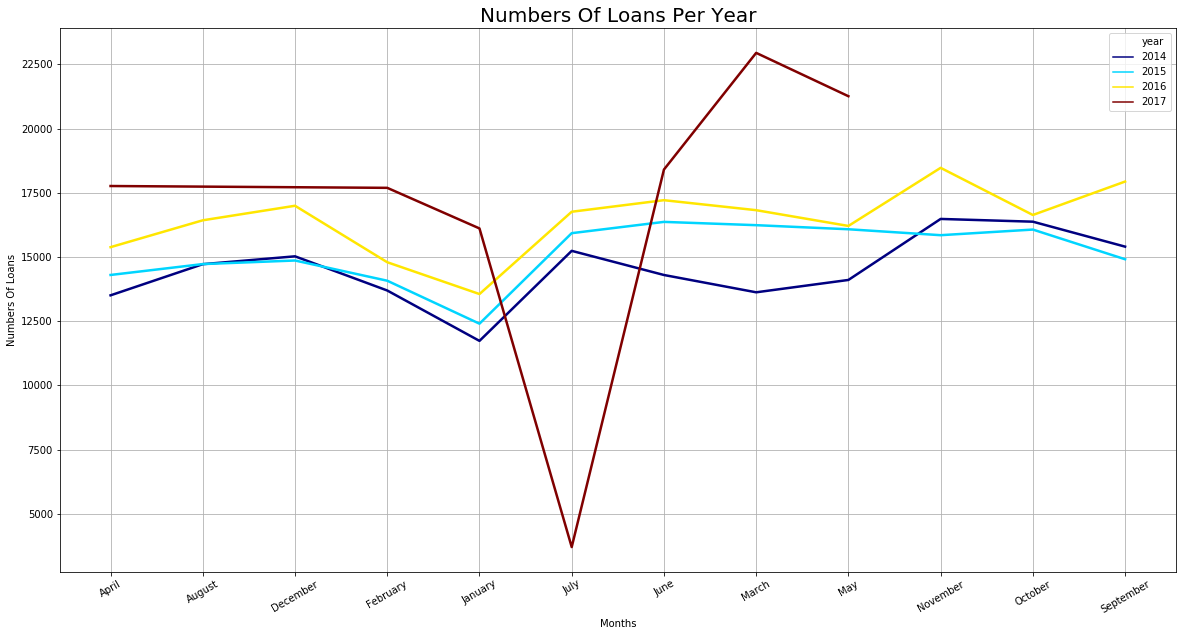

In [14]:
month_year_loans= kiva_loans.groupby(["year","number_month","month"]).date.count().reset_index().sort_values(by=["year","number_month"])
plt.figure(figsize=(20,10))
chart=sns.lineplot(data=month_year_loans, x="month", y="date", hue="year", palette='jet', linewidth=2.5)
plt.xticks(rotation=30)
plt.grid(True)
plt.title("numbers of loans per year".title(), fontsize=20)
plt.ylabel("numbers of loans".title())
plt.xlabel("months".title())
plt.show()

### Distribution of repayment

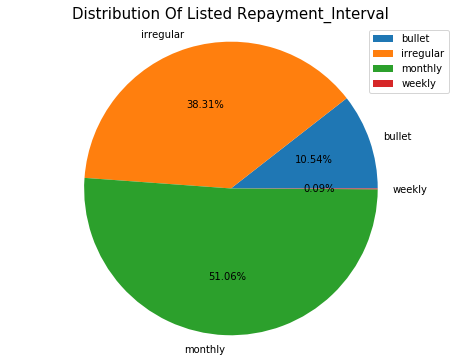

In [15]:
repayment=kiva_loans.groupby(["repayment_interval"]).date.count().reset_index()
repayment
plt.figure(figsize=(8,6))
plt.pie(repayment.date,labels=repayment.repayment_interval, autopct="%0.2f%%")
plt.axis("equal")
plt.title("Distribution of listed repayment_interval".title(), fontsize=15)
plt.legend()
plt.show()


### Loans by activity in three different Sectors

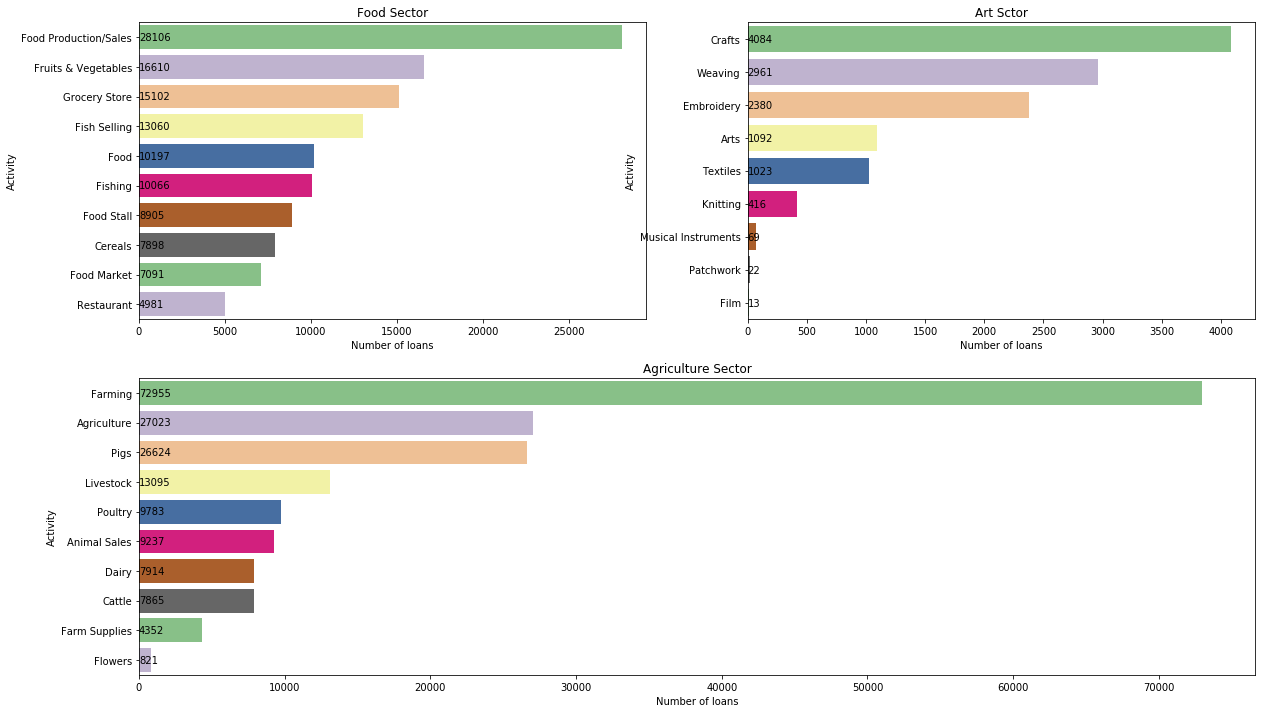

In [16]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
food=kiva_loans[kiva_loans.sector=="Food"]
food_loans = food.groupby(["sector","activity"]).date.count().reset_index().sort_values(by="date", ascending=False).iloc[:10]
sns.barplot(y="activity", x='date', data=food_loans, palette='Accent')
for i, v in enumerate(food_loans.date): 
        plt.text(.6,i+0.1, round(v,2),fontsize=10,color='k')
plt.title("Food sector".title())
plt.xlabel("Number of loans")
plt.ylabel("activity".title())


plt.subplot(2,2,2)
food=kiva_loans[kiva_loans.sector=="Arts"]
food_loans = food.groupby(["sector","activity"]).date.count().reset_index().sort_values(by="date", ascending=False).iloc[:10]
sns.barplot(y="activity", x='date', data=food_loans, palette='Accent')
for i, v in enumerate(food_loans.date): 
        plt.text(.6,i+0.1, round(v,2),fontsize=10,color='k')
plt.title("art sctor".title())
plt.xlabel("Number of loans")
plt.ylabel("activity".title())

plt.subplot(2,1,2)
food=kiva_loans[kiva_loans.sector=="Agriculture"]
food_loans = food.groupby(["sector","activity"]).date.count().reset_index().sort_values(by="date", ascending=False).iloc[:10]
sns.barplot(y="activity", x='date', data=food_loans, palette='Accent')
for i, v in enumerate(food_loans.date): 
        plt.text(.6,i+0.1, round(v,2),fontsize=10,color='k')
plt.title("Agriculture sector".title())
plt.xlabel("Number of loans")
plt.ylabel("activity".title())
plt.show()

### Boxplot of loan amount

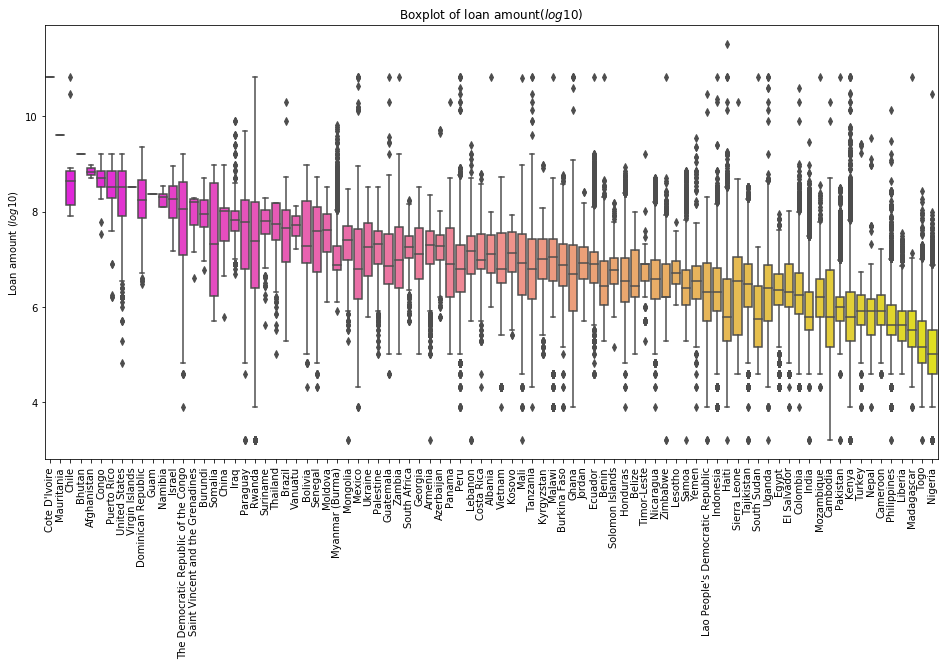

In [17]:
plt.figure(figsize=(16,8))

poo = kiva_loans.groupby('country').mean()['loan_amount'].sort_values(ascending=False)
sns.boxplot(kiva_loans['country'], np.log(kiva_loans['loan_amount']), palette='spring',order=poo.index)
plt.xlabel('')
plt.ylabel('Loan amount ($log10$)')
plt.title('Boxplot of loan amount($log10$)')
plt.xticks(rotation=90);

### Distribution of loans on a world map

In [25]:
maps =kiva_loans.groupby("country").date.count().reset_index()

import plotly.offline as py

import plotly.graph_objs as go


data = [ dict(
        type = 'choropleth',
        locations = maps['country'],
        locationmode = 'country names',
        z = maps['date'],
        text = maps['country'],
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Loans'),
      ) ]

layout = dict(
    title = 'Couting of Loans Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

figure = dict( data=data, layout=layout )
py.iplot(figure, validate=False, filename='map-countrys-count')

### Distribution of loans by sectors in Peru

In [18]:
df_peru = kiva_loans[kiva_loans.country=="Peru"]
df_peru = df_peru.groupby("sector").region.count().reset_index()
df_peru.style.background_gradient()

,sector,region
0,Agriculture,6576
1,Arts,698
2,Clothing,896
3,Construction,454
4,Education,1172
5,Entertainment,37
6,Food,5010
7,Health,211
8,Housing,543
9,Manufacturing,173
